In [36]:
import numpy as np
import sympy as sp
import itertools
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Simulating from distribution

In [2]:
# Draw from the normal distribution 10 times
sd = 1
mu = 0
np.random.normal(mu, sd,10)

array([-1.05074034, -0.6627421 , -0.19389847,  0.35320045,  0.19195925,
        0.19088348,  0.04381748,  0.5478479 , -0.17806671, -1.1399183 ])

In [3]:
# Throw a fair dice 8 times and count the number of sixes
n = 8
p = 1/6
np.random.binomial(n,p,10)

array([0, 2, 0, 2, 3, 0, 2, 1, 2, 0])

In [4]:
# Draw from the continous uniform (0,1) distribution 10 times
low = 0
high = 1
np.random.uniform(low, high, 10)

array([0.77292167, 0.81778531, 0.57489379, 0.5334397 , 0.28982987,
       0.34338972, 0.47481679, 0.35861124, 0.51550975, 0.51878395])

In [24]:
# Draw from gamma distribution - shape = r, scale = 1/lambda
p_in_dx = sum([(v > 2 and v < (2+1/52)) for v in np.random.gamma(3,1,1_000_000)])/1_000_000
p_gt_2 = sum(np.random.gamma(3,1,1_000_000) > 2)/1_000_000
p_in_dx/p_gt_2


0.007771446473220355

In [25]:
1/130

0.007692307692307693

# CDF

In [5]:
scipy.stats.norm.cdf(0)

0.5

In [6]:
scipy.stats.gamma.cdf(1,1)

0.6321205588285577

In [7]:
scipy.stats.expon.cdf(1), 1 - np.exp(-1)

(0.6321205588285577, 0.6321205588285577)

# Custom pdf simulation - 1D

In [8]:
def custom_pdf_1D(a:int,b:int,f,size:int, n_steps:int = 100_000):
    steps = np.linspace(a,b,(b-a)*n_steps)
    return np.random.choice(steps, size, p=f(steps)/sum(f(steps)))

In [9]:
a = 0
b = 1
f = lambda x: 3*x**2
size = 100_000
print(f"Simulated probability: {sum(custom_pdf_1D(a,b,f,size) < 0.5)/size}")
print(f"Calculated probability: {0.5**3}")

Simulated probability: 0.12364
Calculated probability: 0.125


In [10]:
# Draw from my custom distribution
custom_pdf_1D(a,b,f,5)

array([0.80380804, 0.62723627, 0.46574466, 0.500345  , 0.62802628])

In [61]:
a = 0
b = 1
f = lambda x: 4*x**3
size = 1_000_000
res = custom_pdf_1D(a,b,f,size)
print(f"Simulated probability: {sum(res)/len(res)}")
print(f"Calculated probability: {4/5}")

Simulated probability: 0.8001761690416646
Calculated probability: 0.8


# Custom pdf simulation - 2D

In [11]:
def custom_pdf_2D(ax:int, bx:int, ay:int, by:int, f, size:int, n_steps:int = 5_000):
    steps_x = np.linspace(ax,bx,(bx-ax)*n_steps)
    steps_y = np.linspace(ay,by,(by-ay)*n_steps)
    steps = list(itertools.product(steps_x,steps_y))
    probabilities = np.array([f(step) for step in steps])
    probabilities /= sum(probabilities)
    idxes = np.random.choice([i for i in range(len(steps))], size, p=probabilities)
    return [steps[idx] for idx in idxes]

In [12]:
# Probability that x < 0.5 and y < 0.5, when f(x,y) = 4xy for x,y=0..1

ax = 0
bx = 1
ay = 0
by = 1
size = 10_000
f = lambda arr: 4*arr[0]*arr[1]

sim_values = custom_pdf_2D(ax,bx,ay,by,f,size)
print(f"Simulated probability: {sum([(sim_val[0] < 0.5) and (sim_val[1] < 0.5) for sim_val in sim_values])/size}")
print(f"Calculated probability: {0.5**4}")

Simulated probability: 0.063
Calculated probability: 0.0625


In [13]:
custom_pdf_2D(ax,bx,ay,by,f,size)[:5]

[(0.7263452690538108, 0.9823964792958592),
 (0.7059411882376475, 0.5317063412682537),
 (0.8805761152230446, 0.873374674934987),
 (0.08801760352070415, 0.9773954790958191),
 (0.7391478295659132, 0.6437287457491498)]

Svaret er 3 og simuleres nedenfor
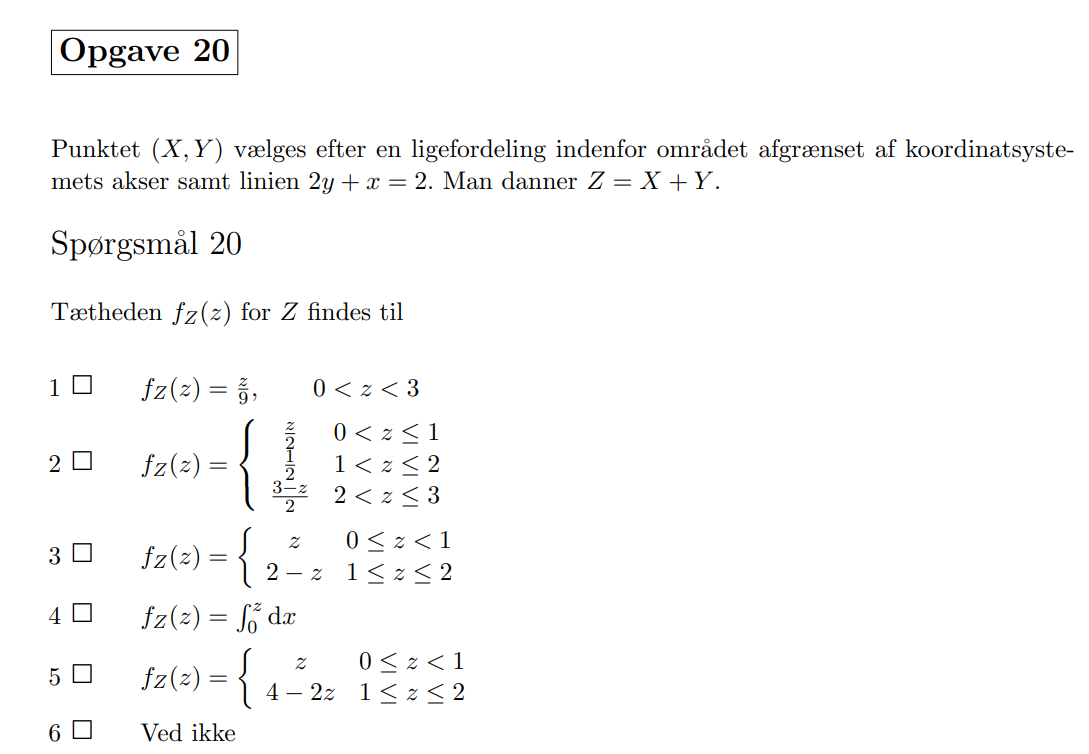

In [38]:
ax = 0
bx = 2
ay = 0
by = 1
size = 20_000
# Note: float(true) = 1, while float(false) = 0
f = lambda arr: float(arr[1] <= (1 - 0.5*arr[0]))
res = custom_pdf_2D(ax,bx,ay,by,f,size)

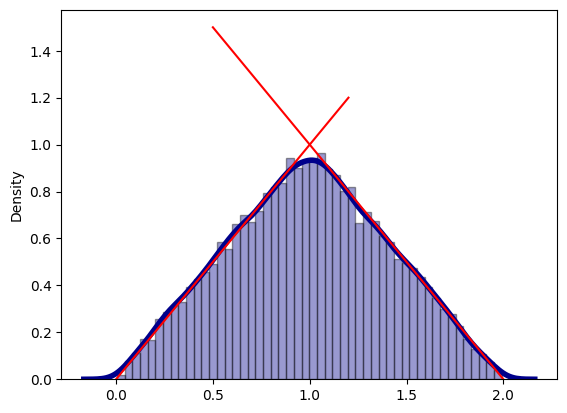

In [50]:
warnings.filterwarnings("ignore")
sns.distplot([r[0]+r[1] for r in res], hist=True, kde=True, 
             bins=int(50), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.plot(np.linspace(0,1.2,100),np.linspace(0,1.2,100), 'red')
plt.plot(np.linspace(0.5,2,100),2 - np.linspace(0.5,2,100), 'red')

Svaret her er 1 og er simuleret nedenfor
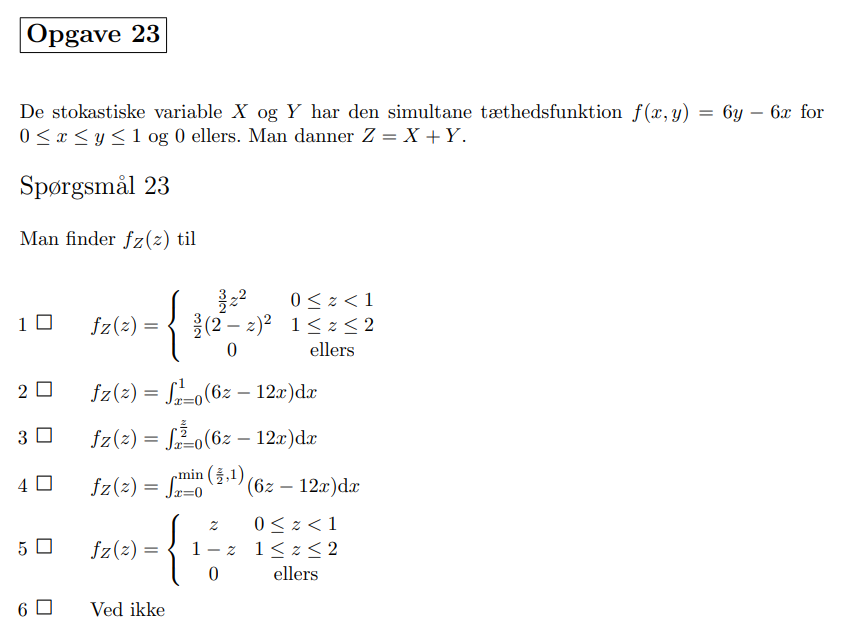

In [53]:
ax = 0
bx = 1
ay = 0
by = 1
size = 40_000
# Note: float(true) = 1, while float(false) = 0
f = lambda arr: float(arr[0] <= arr[1]) * (6*arr[1] - 6*arr[0])
res = custom_pdf_2D(ax,bx,ay,by,f,size)

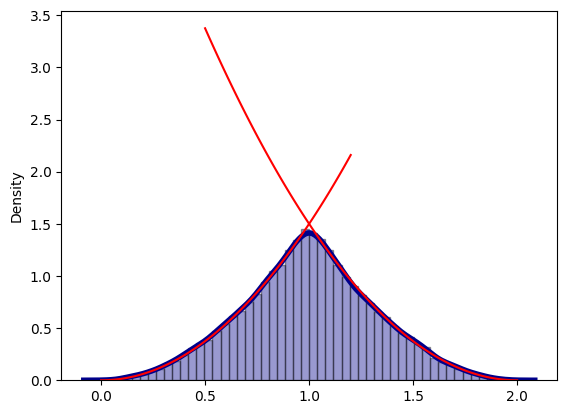

In [56]:
warnings.filterwarnings("ignore")
sns.distplot([r[0]+r[1] for r in res], hist=True, kde=True, 
             bins=int(50), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.plot(np.linspace(0,1.2,100),3/2*np.linspace(0,1.2,100)**2, 'red')
plt.plot(np.linspace(0.5,2,100),3/2*(2 - np.linspace(0.5,2,100))**2, 'red')

Things like this can be simulated like so:
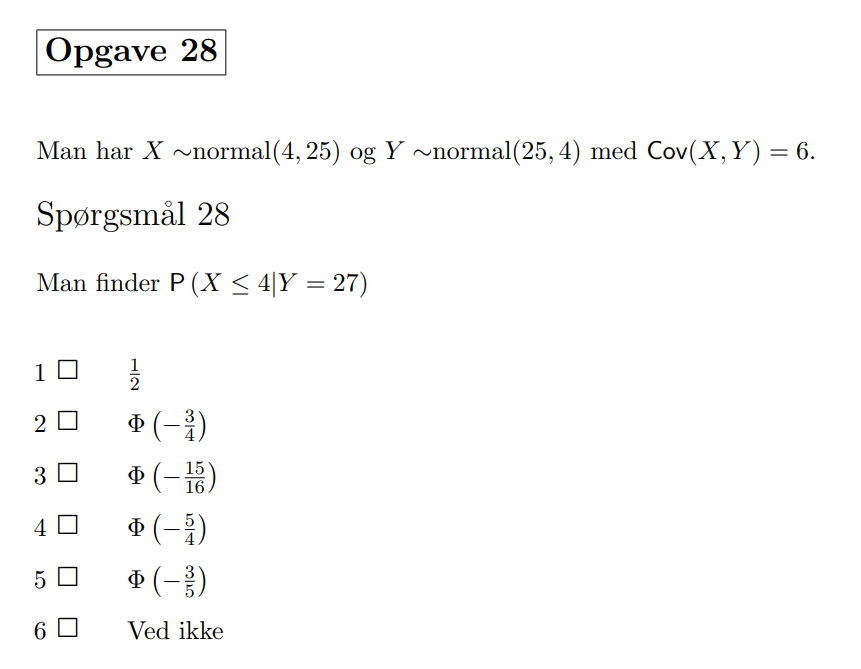
(note that $\rho = \textrm{corr}(X,Y)$), the answer is 2

In [57]:
N = 20_000
Ux = np.random.normal(0,1,N)
Z = np.random.normal(0,1,N)
Uy = 3/5 * Ux + 4/5 * Z 

X = 5*Ux + 4
Y = 2*Uy + 25

X_conditional = [x for x,y in zip(X,Y) if (y > 26.9 and y < 27.1)]
sum(np.array(X_conditional) <= 4)/len(X_conditional)

0.22844827586206898

In [58]:
scipy.stats.norm.cdf(-3/4)

0.2266273523768682